# Notebook Examples for Capter 5 Part 2

In [4]:
%matplotlib inline

### Pauli representation

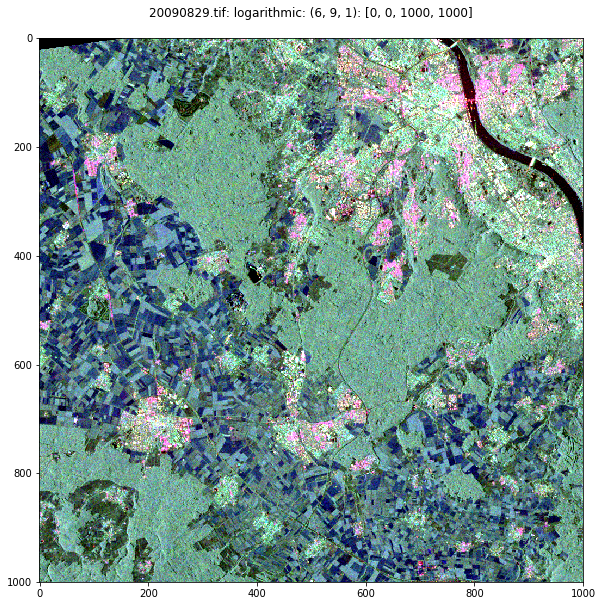

In [5]:
run scripts/dispms -f imagery/20090829.tif -p [6,9,1] \
-s '/home/mort/LaTeX/new projects/CRC4/Chapter5/fig5_16.eps'

### Determining the equivalent number of looks (ENL)

     ENL Estimation
Sat Mar  3 15:31:11 2018
infile:  imagery/20090829.tif
Quad polarimetry
filtering...
row:  100  200 

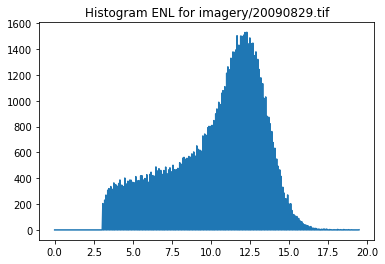

 ENL image written to: imagery/20090829_enl.tif
elapsed time: 8.59535217285


In [10]:
run scripts/enlml -d [500,400,300,300] imagery/20090829.tif

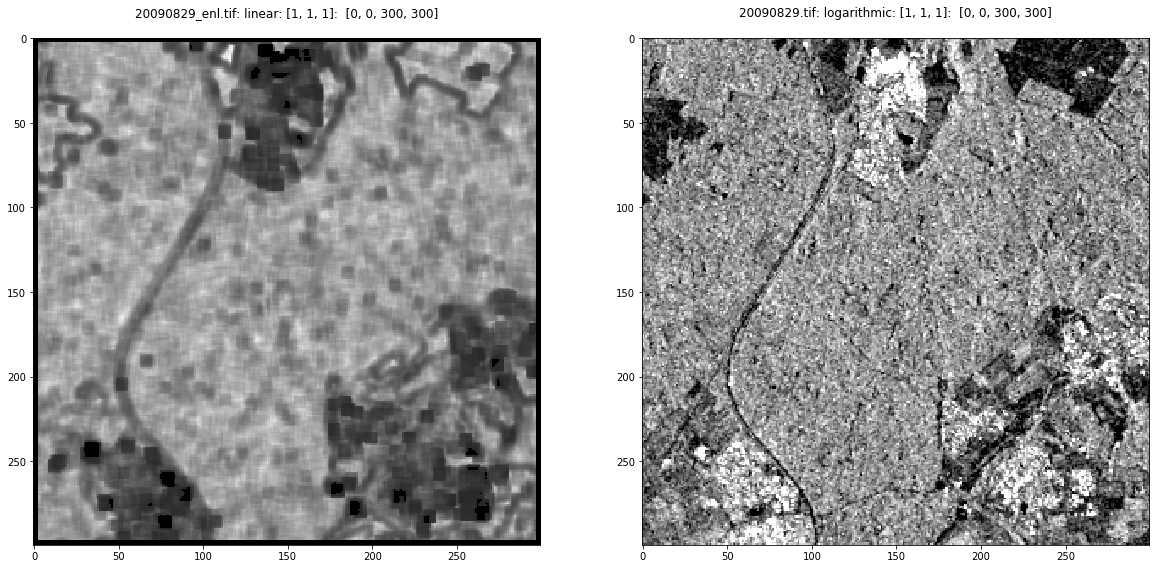

In [16]:
run scripts/dispms -f imagery/20090829_enl.tif -e 2 \
-F imagery/20090829.tif -D [500,400,300,300] \
-s '/home/mort/LaTeX/new projects/CRC4/Chapter5/fig5_18.eps'

### Minimum mean square error (mmse) filter

In [2]:
run scripts/mmse_filter imagery/20090829.tif 12.5

       MMSE_FILTER
Mon Mar  5 09:54:26 2018
infile:  imagery/20090829.tif
number of looks: 12
Determining filter weights from span image
row: 

auxil/congrid.py:86: VisibleDeprecationWarning: `rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.
  newcoords_dims = range(n.rank(newcoords))


 50  100  150  200  250  300  350  400  450  500  550  600  650  700  750  800  850  900  950   done
Filtering covariance matrix elememnts
band: 1
band: 2
band: 3
band: 4
band: 5
band: 6
band: 7
band: 8
band: 9
result written to: imagery/20090829_mmse.tif
elapsed time: 464.533332109


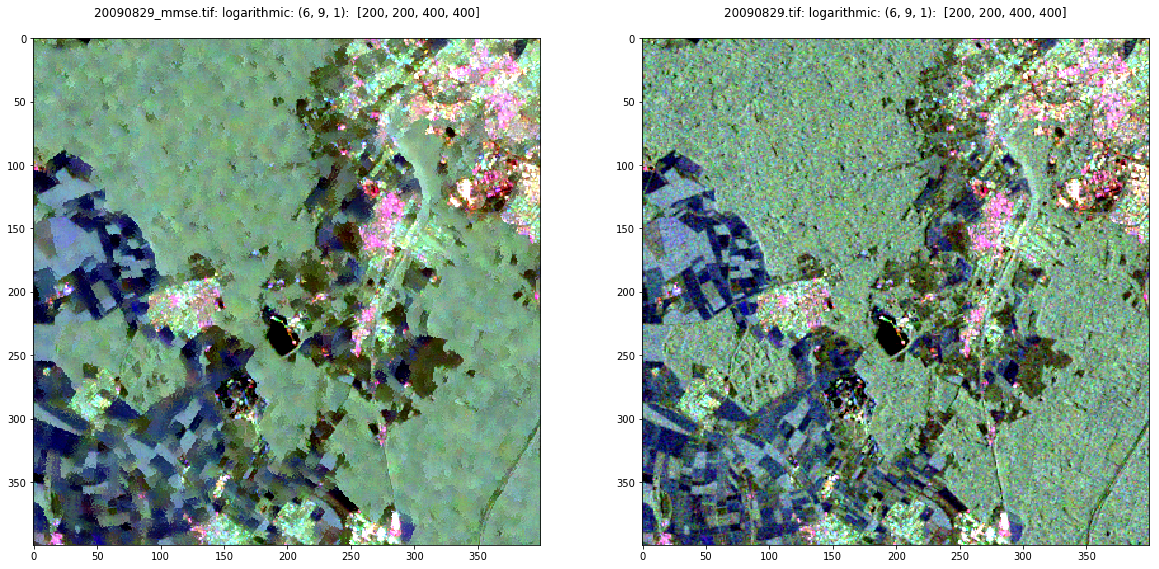

In [15]:
run scripts/dispms -f imagery/20090829_mmse.tif -p [6,9,1] -d [200,200,400,400] \
-F imagery/20090829.tif -P [6,9,1] -D [200,200,400,400] \
-s '/home/mort/LaTeX/new projects/CRC4/Chapter5/fig5_19.eps'

### Gamma-MAP filter

In [11]:
run scripts/gamma_filter imagery/20090829.tif 12.5

    GAMMA MAP FILTER
Mon Mar  5 10:19:01 2018
infile:  imagery/20090829.tif
equivalent number of looks: 12.500000
Attempting parallel computation ...
available engines: [0, 1]
filtering 3 diagonal matrix element bands ...
result written to: imagery/20090829_gamma.tif
elapsed time: 287.622186899


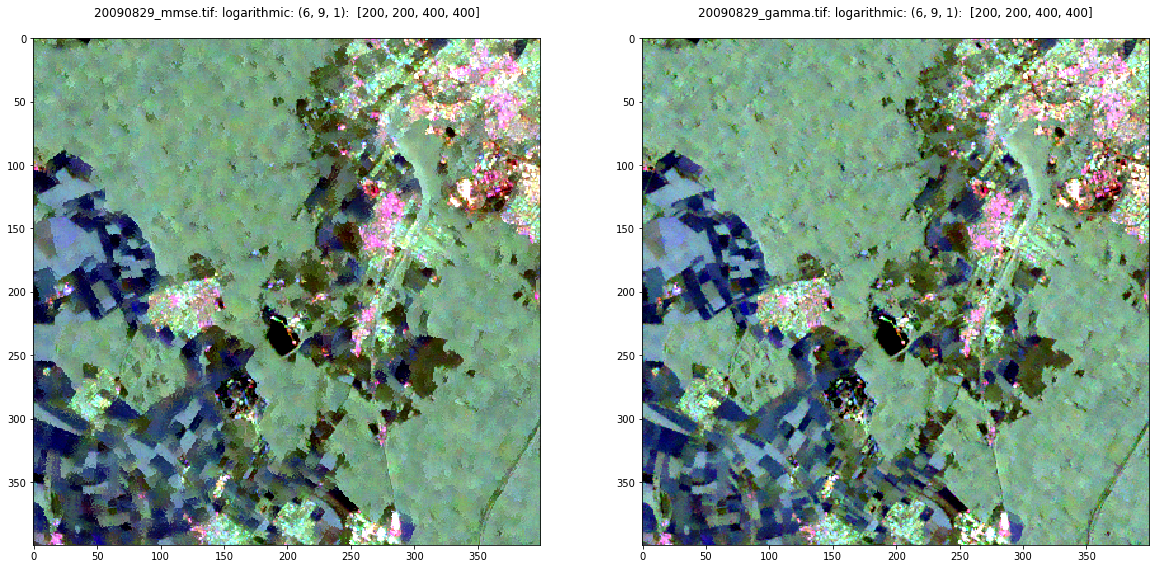

In [16]:
run scripts/dispms -f imagery/20090829_mmse.tif -p [6,9,1] -d [200,200,400,400] \
-F imagery/20090829_gamma.tif -P [2,3,1] -D [200,200,400,400] \
-s '/home/mort/LaTeX/new projects/CRC4/Chapter5/fig5_20.eps'

### Temporal filtering

In [28]:
import ee, math
ee.Initialize()

# convert from decibels to linear scale
def linearize(current):
    return current.multiply(
      ee.Image.constant(math.log(10.0)/10.0)).exp()

# collect a time series
rect = ee.Geometry.Rectangle([6.31,50.83,6.58,50.95]);
collection = ee.ImageCollection('COPERNICUS/S1_GRD')\
.filterBounds(rect)\
.filterDate(ee.Date('2017-05-01'),ee.Date('2017-06-01'))\
.filter(ee.Filter.eq('resolution_meters', 10)) \
.filter(ee.Filter.eq('orbitProperties_pass','ASCENDING'))\
.map(linearize)  

# series lenhth
count =  collection.toList(100).length()            
print 'series length: %i'%count.getInfo()  

# temporally filtered image band
filtered = collection.mean().select(0).clip(rect)

# unfiltered image band for comparison
unfiltered = ee.Image(collection.first()).select(0)\
                                        .clip(rect)
    
# export to Google Drive
outimage = ee.Image.cat(unfiltered,filtered)
gdexport = ee.batch.Export.image.toDrive(outimage,
     description='driveExportTask', 
     folder = 'EarthEngineImages',
     fileNamePrefix='temporalfiltered',scale=10)                
gdexport.start() 

series length: 11


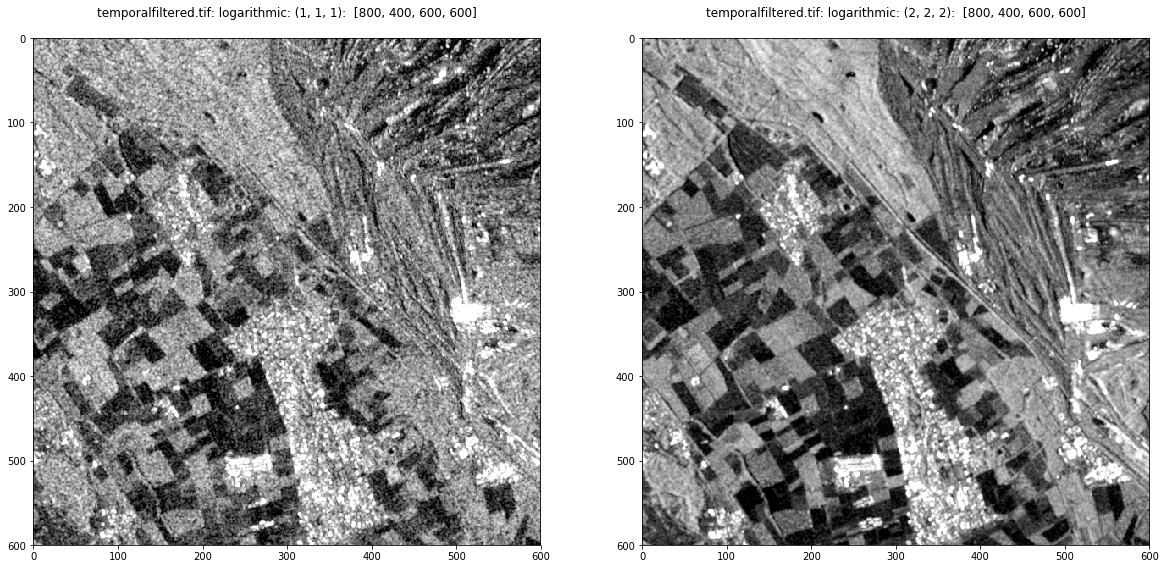

In [27]:
run scripts/dispms -f imagery/temporalfiltered.tif \
                     -d [800,400,600,600] -p [1,1,1]\
                   -F imagery/temporalfiltered.tif \
                     -D [800,400,600,600] -P [2,2,2] \
-s '/home/mort/LaTeX/new projects/CRC4/Chapter5/fig5_21.eps'            

### Slope and aspect

In [10]:
!gdaldem slope imagery/asterdem imagery/asterslope.tif

0...10...20...30...40...50...60...70...80...90...100 - done.


In [12]:
!gdaldem aspect imagery/asterdem imagery/asteraspect.tif

0...10...20...30...40...50...60...70...80...90...100 - done.


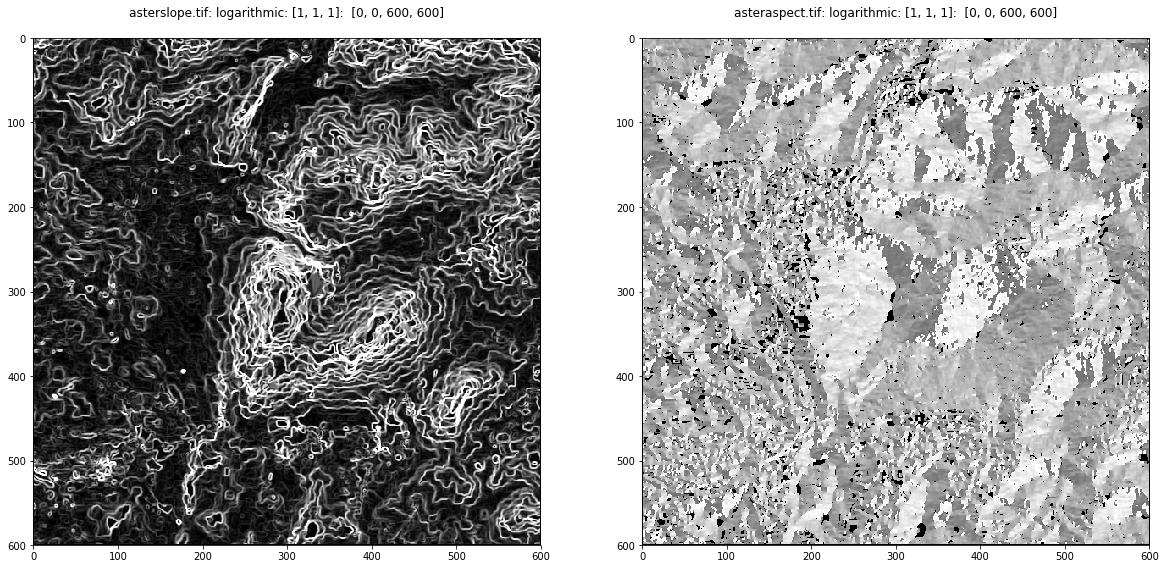

In [2]:
run scripts/dispms -f imagery/asterslope.tif \
  -F imagery/asteraspect.tif \
-s  '/home/mort/LaTeX/new projects/CRC4/Chapter5/fig5_30.eps'   

### Illumination correction

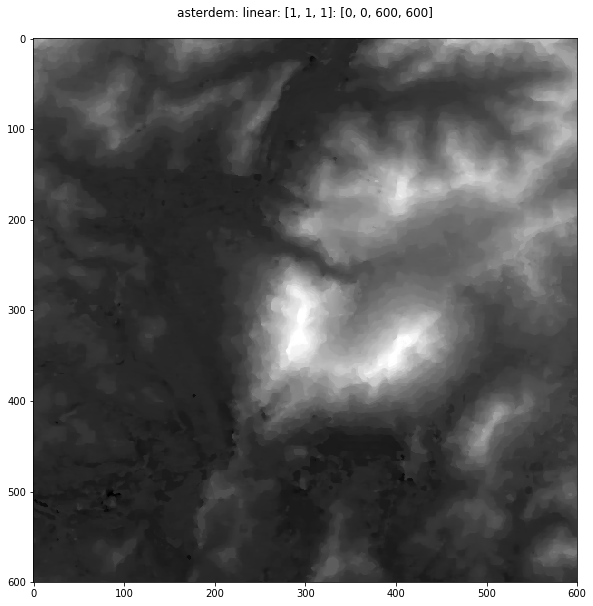

In [10]:
run scripts/dispms -f imagery/asterdem -e 2

In [12]:
run scripts/c_corr -h


Usage:
-----------------------------------------------------------------------
python scripts/c_corr.py [-d spatialDimensions] [-p bandPositions]  [-c classfilename]
           solarAzimuth(deg) solarElevation(deg) msfilename demfilename 

bandPositions and spatialDimensions are lists, 
e.g., -p [1,2,3] -d [0,0,400,400]

Outfile name is msfilename_corr with same format as msfilename      
-----------------------------------------------------


In [3]:
run scripts/c_corr 151.3 57.7 imagery/3N_subset imagery/asterdem

-------------------------
   C-Correction
-------------------------
Sat Mar 10 14:55:35 2018
MS  file: imagery/3N_subset
DEM file: imagery/asterdem
Band: 1 Class: 1 Pixels: 360000 Slope: 18.075971 Intercept: 76.160628 Correlation: 0.173378
---correcting band 1, class 1
c-corrected image written to: imagery/3N_subset_corr
elapsed time: 0.489331007004


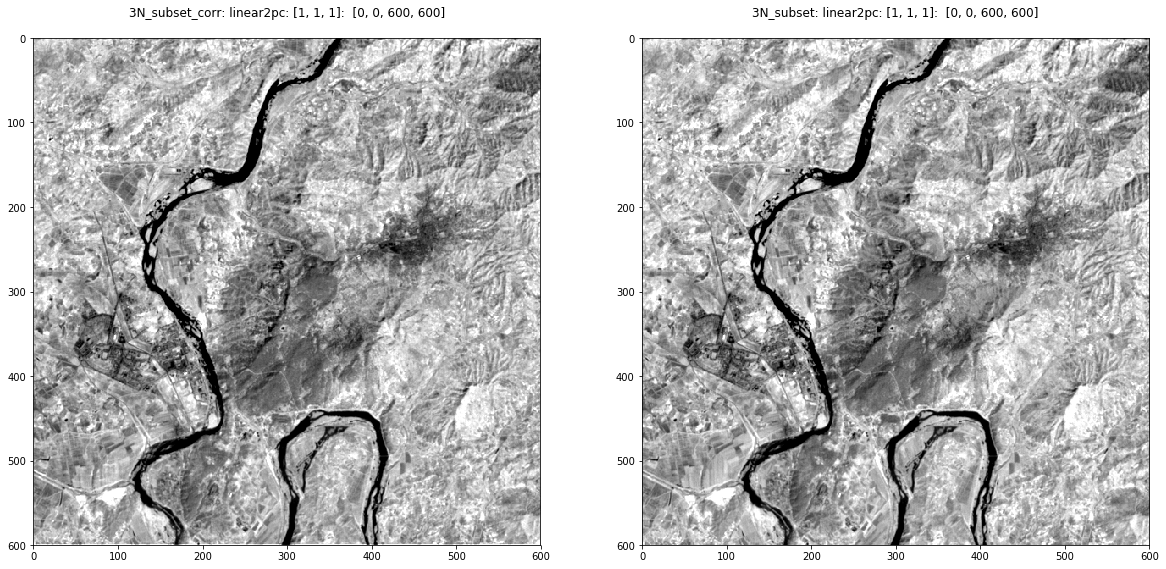

In [6]:
run scripts/dispms -f imagery/3N_subset_corr -e 3 -F imagery/3N_subset -E 3